In [1]:
# Yes/Success = 1   (Defaulters)
# No/ Failure = 0   (Non Defaulters)

In [2]:
#CREATE DATA FRAME

import pandas as pd
import numpy as np
from sklearn import preprocessing,metrics
from IPython.core.display import HTML
pd.set_option("display.max_columns",75)
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model,svm
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

In [3]:
#%%
   
#import data
df = pd.read_table(r'C:\Users\rutuja\Desktop\New folder\python\XYZCorp_LendingData.txt',low_memory=False)

In [4]:
print(df.isnull().sum())

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       49443
emp_length                      43061
home_ownership                      0
annual_inc                          0
verification_status                 0
issue_d                             0
pymnt_plan                          0
desc                           734157
purpose                             0
title                              33
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                         0
earliest_cr_line                    0
inq_last_6mths                      0
mths_since_l

In [5]:
df.shape

(855969, 73)

In [6]:
#%%
#EDA
#1.removing var. that has more then 50-60% missing value
#2.treating missing value as well as DATA VISUALIZATION

In [7]:
df['default_ind'].value_counts()

0    809502
1     46467
Name: default_ind, dtype: int64

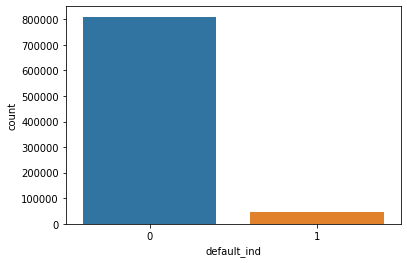

In [8]:
sns.countplot('default_ind',data=df)

In [9]:
#detected MV
half_count = len(df)/2
df_1=df.dropna(thresh=half_count, axis=1)
print(df_1.isnull().sum())

df_1.shape

id                                 0
member_id                          0
loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
term                               0
int_rate                           0
installment                        0
grade                              0
sub_grade                          0
emp_title                      49443
emp_length                     43061
home_ownership                     0
annual_inc                         0
verification_status                0
issue_d                            0
pymnt_plan                         0
purpose                            0
title                             33
zip_code                           0
addr_state                         0
dti                                0
delinq_2yrs                        0
earliest_cr_line                   0
inq_last_6mths                     0
open_acc                           0
pub_rec                            0
r

(855969, 52)

In [10]:
#%%

#treating other MV's
df_1['emp_length'].fillna(df_1['emp_length'].mode()[0],inplace=True)


In [11]:
df_1["tot_cur_bal"].fillna(round(df_1["tot_cur_bal"].mean(),0),inplace=True)


In [12]:
df_1["total_rev_hi_lim"].fillna(round(df_1["total_rev_hi_lim"].mean(),0),inplace=True)

In [13]:
df_1["revol_util"].fillna(round(df_1["revol_util"].mean(),0),inplace=True)


In [14]:
df_1['last_pymnt_d'].fillna(df_1['last_pymnt_d'].mode()[0],inplace=True)


In [15]:
df_1['title'].fillna(df_1['title'].mode()[0],inplace=True)


In [16]:

df_1['emp_title'].fillna(df_1['emp_title'].mode()[0],inplace=True)


In [17]:
df_1['last_credit_pull_d'].fillna(df_1['last_credit_pull_d'].mode()[0],inplace=True)

In [18]:
print(df_1.isnull().sum())

id                                 0
member_id                          0
loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
term                               0
int_rate                           0
installment                        0
grade                              0
sub_grade                          0
emp_title                          0
emp_length                         0
home_ownership                     0
annual_inc                         0
verification_status                0
issue_d                            0
pymnt_plan                         0
purpose                            0
title                              0
zip_code                           0
addr_state                         0
dti                                0
delinq_2yrs                        0
earliest_cr_line                   0
inq_last_6mths                     0
open_acc                           0
pub_rec                            0
r

In [19]:
my_df=df_1.drop(["loan_amnt","funded_amnt","funded_amnt_inv","installment","dti","delinq_2yrs","next_pymnt_d","id",
                 "pub_rec","collections_12_mths_ex_med","tot_coll_amt","policy_code","acc_now_delinq"], axis=1)

In [20]:
my_df.isnull().sum()


member_id                  0
term                       0
int_rate                   0
grade                      0
sub_grade                  0
emp_title                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
pymnt_plan                 0
purpose                    0
title                      0
zip_code                   0
addr_state                 0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
revol_bal                  0
revol_util                 0
total_acc                  0
initial_list_status        0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_recovery_fee    0
last_pymnt_d               0
last_pymnt_amnt            0
last_credit_pu

In [21]:
my_df.dtypes

member_id                    int64
term                        object
int_rate                   float64
grade                       object
sub_grade                   object
emp_title                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
pymnt_plan                  object
purpose                     object
title                       object
zip_code                    object
addr_state                  object
earliest_cr_line            object
inq_last_6mths             float64
open_acc                   float64
revol_bal                  float64
revol_util                 float64
total_acc                  float64
initial_list_status         object
out_prncp                  float64
out_prncp_inv              float64
total_pymnt                float64
total_pymnt_inv            float64
total_rec_prncp            float64
total_rec_int       

In [22]:
my_df.shape

(855969, 39)

In [23]:
df1=my_df.groupby('verification_status')
df1['default_ind'].value_counts()

verification_status  default_ind
Not Verified         0              245256
                     1               12486
Source Verified      0              303976
                     1               14202
Verified             0              260270
                     1               19779
Name: default_ind, dtype: int64

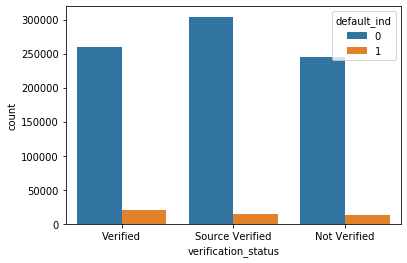

In [24]:
sns.countplot('verification_status',data=my_df,hue='default_ind')

In [25]:
my_df['verification_status'] = np.where(my_df['verification_status']=='Not Verified', 0, my_df['verification_status'])
my_df['verification_status'] = np.where(my_df['verification_status']=='Source Verified',1, my_df['verification_status'])
my_df['verification_status'] = np.where(my_df['verification_status']=='Verified',2, my_df['verification_status'])


In [26]:
my_df['verification_status']=my_df['verification_status'].astype(float)

In [27]:
my_df['grade'].value_counts()

B    247998
C    236855
A    145665
D    132802
E     66448
F     21328
G      4873
Name: grade, dtype: int64

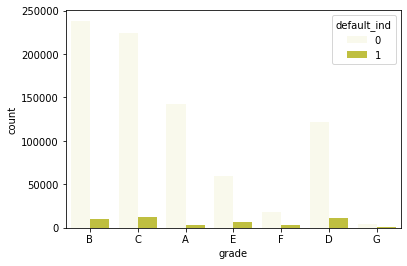

In [28]:
sns.countplot('grade',data=my_df,hue='default_ind',color='yellow',saturation=0.5)

In [29]:
my_df['grade'] = np.where(my_df['grade']=='A', 0, my_df['grade'])
my_df['grade'] = np.where(my_df['grade']=='B', 0, my_df['grade'])
my_df['grade'] = np.where(my_df['grade']=='C', 0, my_df['grade'])
my_df['grade'] = np.where(my_df['grade']=='D', 1, my_df['grade'])
my_df['grade'] = np.where(my_df['grade']=='E', 1, my_df['grade'])
my_df['grade'] = np.where(my_df['grade']=='F', 1, my_df['grade'])
my_df['grade'] = np.where(my_df['grade']=='G', 1, my_df['grade'])

In [30]:
my_df['grade']=my_df['grade'].astype(float)

In [31]:
my_df['home_ownership'].value_counts()

MORTGAGE    429106
RENT        342535
OWN          84136
OTHER          144
NONE            45
ANY              3
Name: home_ownership, dtype: int64

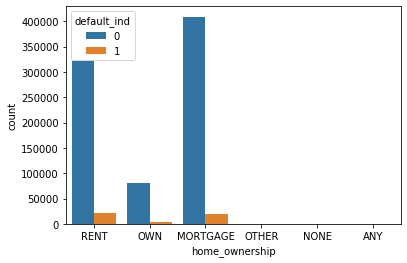

In [32]:
sns.countplot('home_ownership',data=my_df,hue='default_ind')

In [33]:
my_df['home_ownership'] = np.where(my_df['home_ownership']=='RENT', 1, my_df['home_ownership'])
my_df['home_ownership'] = np.where(my_df['home_ownership']=='OWN', 0, my_df['home_ownership'])
my_df['home_ownership'] = np.where(my_df['home_ownership']=='MORTGAGE', 0, my_df['home_ownership'])
my_df['home_ownership'] = np.where(my_df['home_ownership']=='NONE', 1, my_df['home_ownership'])
my_df['home_ownership'] = np.where(my_df['home_ownership']=='OTHER', 1, my_df['home_ownership'])
my_df['home_ownership'] = np.where(my_df['home_ownership']=='ANY', 1, my_df['home_ownership'])

In [34]:
my_df['home_ownership']=my_df['home_ownership'].astype(float)

In [35]:
my_df.dtypes

member_id                    int64
term                        object
int_rate                   float64
grade                      float64
sub_grade                   object
emp_title                   object
emp_length                  object
home_ownership             float64
annual_inc                 float64
verification_status        float64
issue_d                     object
pymnt_plan                  object
purpose                     object
title                       object
zip_code                    object
addr_state                  object
earliest_cr_line            object
inq_last_6mths             float64
open_acc                   float64
revol_bal                  float64
revol_util                 float64
total_acc                  float64
initial_list_status         object
out_prncp                  float64
out_prncp_inv              float64
total_pymnt                float64
total_pymnt_inv            float64
total_rec_prncp            float64
total_rec_int       

In [36]:
my_df["issue_d"]=pd.to_datetime(my_df["issue_d"])
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 39 columns):
member_id                  855969 non-null int64
term                       855969 non-null object
int_rate                   855969 non-null float64
grade                      855969 non-null float64
sub_grade                  855969 non-null object
emp_title                  855969 non-null object
emp_length                 855969 non-null object
home_ownership             855969 non-null float64
annual_inc                 855969 non-null float64
verification_status        855969 non-null float64
issue_d                    855969 non-null datetime64[ns]
pymnt_plan                 855969 non-null object
purpose                    855969 non-null object
title                      855969 non-null object
zip_code                   855969 non-null object
addr_state                 855969 non-null object
earliest_cr_line           855969 non-null object
inq_last_6mths             

In [37]:
my_df.issue_d

0        2011-12-01
1        2011-12-01
2        2011-12-01
3        2011-12-01
4        2011-12-01
5        2011-12-01
6        2011-12-01
7        2011-12-01
8        2011-12-01
9        2011-12-01
10       2011-12-01
11       2011-12-01
12       2011-12-01
13       2011-12-01
14       2011-12-01
15       2011-12-01
16       2011-12-01
17       2011-12-01
18       2011-12-01
19       2011-12-01
20       2011-12-01
21       2011-12-01
22       2011-12-01
23       2011-12-01
24       2011-12-01
25       2011-12-01
26       2011-12-01
27       2011-12-01
28       2011-12-01
29       2011-12-01
            ...    
855939   2015-01-01
855940   2015-01-01
855941   2015-01-01
855942   2015-01-01
855943   2015-01-01
855944   2015-01-01
855945   2015-01-01
855946   2015-01-01
855947   2015-01-01
855948   2015-01-01
855949   2015-01-01
855950   2015-01-01
855951   2015-01-01
855952   2015-01-01
855953   2015-01-01
855954   2015-01-01
855955   2015-01-01
855956   2015-01-01
855957   2015-01-01


In [38]:
#creating a new data frame
new_df=my_df[['member_id','term','int_rate','grade','sub_grade','emp_title','emp_length','home_ownership','annual_inc',
              'verification_status','issue_d','pymnt_plan','purpose','title','zip_code','addr_state','earliest_cr_line',
              'inq_last_6mths','open_acc','revol_bal','revol_util','total_acc','initial_list_status','out_prncp',
              'out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','recoveries',
              'total_rec_late_fee','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','application_type',
              'last_credit_pull_d','tot_cur_bal','total_rev_hi_lim','default_ind']]

In [39]:
colname=["application_type","last_credit_pull_d","last_pymnt_d","initial_list_status","pymnt_plan","purpose","title",
        "zip_code","addr_state","earliest_cr_line","emp_title","emp_length","term","sub_grade"]
colname 

['application_type',
 'last_credit_pull_d',
 'last_pymnt_d',
 'initial_list_status',
 'pymnt_plan',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'emp_title',
 'emp_length',
 'term',
 'sub_grade']

In [40]:
from sklearn import preprocessing

le=preprocessing.LabelEncoder()

for x in colname:
    new_df[x]=le.fit_transform(new_df[x])

In [41]:
new_df.dtypes

member_id                           int64
term                                int32
int_rate                          float64
grade                             float64
sub_grade                           int32
emp_title                           int32
emp_length                          int32
home_ownership                    float64
annual_inc                        float64
verification_status               float64
issue_d                    datetime64[ns]
pymnt_plan                          int32
purpose                             int32
title                               int32
zip_code                            int32
addr_state                          int32
earliest_cr_line                    int32
inq_last_6mths                    float64
open_acc                          float64
revol_bal                         float64
revol_util                        float64
total_acc                         float64
initial_list_status                 int32
out_prncp                         

In [42]:
#splitting
import pandas as pd
new_df.issue_d= pd.to_datetime(new_df.issue_d)
new_df = new_df.set_index(new_df['issue_d'])
new_df = new_df.sort_index()
train = new_df['2007-06-01': '2015-05-31']
print(train.shape)
test = new_df['2015-06-01':]
test.shape

(598978, 39)


(256991, 39)

In [43]:
train.default_ind.value_counts()

0    552822
1     46156
Name: default_ind, dtype: int64

In [44]:
test.default_ind.value_counts()

0    256680
1       311
Name: default_ind, dtype: int64

In [45]:
train=train.drop(["issue_d"], axis=1)
test=test.drop(["issue_d"], axis=1)

In [46]:
#%%

#train test

X_train=train.values[:,:-1]
#all rows and all comuns except last column
Y_train=train.values[:,-1]
#all rows and last column
X_test=test.values[:,:-1]#all rows except last column
Y_test=test.values[:,-1]#all rows and -1 denotes last column


In [47]:
# Bring in evaluator
#import sklearn.metrics as mt
#from sklearn.model_selection import cross_val_score

# Flatten Data
from sklearn.preprocessing import StandardScaler, RobustScaler
#standar scaler 

std_scaler = StandardScaler()
##rob_scaler = RobustScaler()

X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

# Use robust scaler to reduce outliers
#X_train= rob_scaler.fit_transform(X_train)
#X_test= rob_scaler.transform(X_test)

In [48]:
from sklearn.preprocessing import MinMaxScaler

# create scaler 
##scaler = MinMaxScaler()

# fit and transform in one step 
##X_train = scaler.fit_transform(X_train)
##X_test = scaler.fit_transform(X_test)

#df2 = pd.DataFrame(df2)


In [49]:
#%% 
#RUNNING DECISION TREE

#predicting using the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree=DecisionTreeClassifier(random_state=10,min_samples_leaf=5,max_depth=10)

#fit the model on the data and predict the values
model_DecisionTree.fit(X_train,Y_train)
Y_pred=model_DecisionTree.predict(X_test)

In [50]:
Y_pred=model_DecisionTree.predict(X_test)
#print(Y_pred)
#print(list(zip(Y_test,Y_pred)))

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm = confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc = accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

[[256674      6]
 [    12    299]]
Classification report: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    256680
         1.0       0.98      0.96      0.97       311

    accuracy                           1.00    256991
   macro avg       0.99      0.98      0.99    256991
weighted avg       1.00      1.00      1.00    256991

Accuracy of the model:  0.9999299586366838


In [52]:
print(list(zip(colname,model_DecisionTree.feature_importances_))) #it gives the imp. features ka list

[('application_type', 0.04056248974643728), ('last_credit_pull_d', 0.002412302753639154), ('last_pymnt_d', 0.008975825209221838), ('initial_list_status', 0.0), ('pymnt_plan', 0.0006935942694740649), ('purpose', 1.6981744094101194e-05), ('title', 0.0), ('zip_code', 0.0), ('addr_state', 0.0002348193614797121), ('earliest_cr_line', 0.0), ('emp_title', 0.0), ('emp_length', 2.775310585913015e-05), ('term', 0.0), ('sub_grade', 0.0)]


In [55]:
#%%
#RUNNING RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier
lr=RandomForestClassifier(n_estimators=5, criterion='gini')
lr.fit(X_train,Y_train)
Y_pred=lr.predict(X_test)
Y_pred_prob=lr.predict_proba(X_test)

In [56]:
from sklearn.metrics import confusion_matrix,accuracy_score,\
classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report:")
print(classification_report(Y_test,Y_pred))

#calculate accuracy score
acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model:", acc)

[[248355   8325]
 [     7    304]]
Classification report:
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98    256680
         1.0       0.04      0.98      0.07       311

    accuracy                           0.97    256991
   macro avg       0.52      0.97      0.53    256991
weighted avg       1.00      0.97      0.98    256991

Accuracy of the model: 0.9675786311582896


In [57]:

pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [58]:
#%%
#RUNNONG XGBOOST


#predicting using the bagging_classifier
from xgboost import XGBClassifier #xgboost is not suitable for the less no. of data

model=XGBClassifier(random_state=10)

#fit the model on the data and predict the values
model=model.fit(X_train,Y_train)

Y_pred=model.predict(X_test)

In [59]:


from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print()
print("Classificationreport:")
acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)
print(classification_report(Y_test,Y_pred))

[[256678      2]
 [    12    299]]

Classificationreport:
Accuracy of the model:  0.9999455233840874
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    256680
         1.0       0.99      0.96      0.98       311

    accuracy                           1.00    256991
   macro avg       1.00      0.98      0.99    256991
weighted avg       1.00      1.00      1.00    256991



In [60]:
#%%
#RUNNING LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression

#create a model
classifier = LogisticRegression()
#fitting training data to the model
classifier.fit(X_train,Y_train)

Y_pred = classifier.predict(X_test)
print(list(zip(Y_test,Y_pred)))



IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [61]:
print(classifier.coef_)
print(classifier.intercept_)

[[ 3.06359050e-01  3.09129568e-01  1.15931641e+00  4.64789121e-02
  -1.41085695e+00  3.75637089e-02  2.14576131e-02  1.44994798e-02
   6.16080253e-02  2.20411466e-01 -1.07513616e-02 -2.46241165e-01
  -3.53234989e-02  4.43669804e-03 -2.09760285e-02 -2.53845471e-02
   6.53850191e-02  1.21727316e-01  2.21274850e-01  5.99039888e-02
   1.00669975e-01  2.02463114e-01 -4.34329238e+00 -3.13835947e+00
  -1.96287832e-01 -1.12622647e+00 -3.32249869e+00  3.31021901e+00
   2.82821371e+01  2.18329186e-01  1.02666792e+01  2.44094275e-01
  -3.11351437e+00  0.00000000e+00 -4.43996432e-01 -5.78023351e-02
  -2.39588563e-02]]
[-4.38842568]


In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm = confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc = accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

[[256407    273]
 [   110    201]]
Classification report: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    256680
         1.0       0.42      0.65      0.51       311

    accuracy                           1.00    256991
   macro avg       0.71      0.82      0.76    256991
weighted avg       1.00      1.00      1.00    256991

Accuracy of the model:  0.9985096754361048


In [63]:
#%%
#ADJUSTING THE THRESHOLD
#store the predicted probabilities
y_pred_prob = classifier.predict_proba(X_test) #difference of predict and predict_proba ?????
print(y_pred_prob)

[[1.00000000e+00 1.20620807e-13]
 [9.99914209e-01 8.57914253e-05]
 [9.99921892e-01 7.81082249e-05]
 ...
 [9.99962831e-01 3.71686697e-05]
 [1.00000000e+00 7.64780550e-16]
 [1.00000000e+00 7.33526403e-15]]


In [64]:
for a in np.arange(0,1,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0) #this looping structure is used to select a threshold
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :", 
         cfm[1,0]," , type 1 error:", cfm[0,1])
#we have to minimise the total error as well as type II error (even your type I error should not be miss-classified)
#so we have to get such a situation/threshold, were we get both the type of error & the total error minimum

Errors at threshold  0.0 : 256680  , type 2 error : 0  , type 1 error: 256680
Errors at threshold  0.01 : 31315  , type 2 error : 55  , type 1 error: 31260
Errors at threshold  0.02 : 22232  , type 2 error : 57  , type 1 error: 22175
Errors at threshold  0.03 : 17418  , type 2 error : 58  , type 1 error: 17360
Errors at threshold  0.04 : 14773  , type 2 error : 60  , type 1 error: 14713
Errors at threshold  0.05 : 12997  , type 2 error : 60  , type 1 error: 12937
Errors at threshold  0.06 : 11625  , type 2 error : 62  , type 1 error: 11563
Errors at threshold  0.07 : 10487  , type 2 error : 62  , type 1 error: 10425
Errors at threshold  0.08 : 9524  , type 2 error : 62  , type 1 error: 9462
Errors at threshold  0.09 : 8701  , type 2 error : 62  , type 1 error: 8639
Errors at threshold  0.1 : 8001  , type 2 error : 62  , type 1 error: 7939
Errors at threshold  0.11 : 7311  , type 2 error : 62  , type 1 error: 7249
Errors at threshold  0.12 : 6745  , type 2 error : 62  , type 1 error: 66

In [65]:
y_pred_class=[] #it will consider only the column 1 (since the column start with 0 1st column implies 2nd column)
for value in y_pred_prob[:,1]:
    if value > 0.55:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
print(y_pred_class)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [66]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(Y_test,y_pred_class)
print(cfm)
acc=accuracy_score(Y_test,y_pred_class)
print("Accuracy of the model: ",acc)
print(classification_report(Y_test,y_pred_class))

[[256531    149]
 [   124    187]]
Accuracy of the model:  0.9989377059897039
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    256680
         1.0       0.56      0.60      0.58       311

    accuracy                           1.00    256991
   macro avg       0.78      0.80      0.79    256991
weighted avg       1.00      1.00      1.00    256991



In [67]:
y_pred_class=[] #it will consider only the column 1 (since the column start with 0 1st column implies 2nd column)
for value in y_pred_prob[:,1]:
    if value > 0.52:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
print(y_pred_class)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [68]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(Y_test,y_pred_class)
print(cfm)
acc=accuracy_score(Y_test,y_pred_class)
print("Accuracy of the model: ",acc)
print(classification_report(Y_test,y_pred_class))

[[256464    216]
 [   116    195]]
Accuracy of the model:  0.9987081259655007
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    256680
         1.0       0.47      0.63      0.54       311

    accuracy                           1.00    256991
   macro avg       0.74      0.81      0.77    256991
weighted avg       1.00      1.00      1.00    256991



In [69]:
y_pred_class=[] #it will consider only the column 1 (since the column start with 0 1st column implies 2nd column)
for value in y_pred_prob[:,1]:
    if value > 0.54:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
print(y_pred_class)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [70]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(Y_test,y_pred_class)
print(cfm)
acc=accuracy_score(Y_test,y_pred_class)
print("Accuracy of the model: ",acc)
print(classification_report(Y_test,y_pred_class))

[[256507    173]
 [   123    188]]
Accuracy of the model:  0.9988482086921332
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    256680
         1.0       0.52      0.60      0.56       311

    accuracy                           1.00    256991
   macro avg       0.76      0.80      0.78    256991
weighted avg       1.00      1.00      1.00    256991



In [71]:
y_pred_class=[] #it will consider only the column 1 (since the column start with 0 1st column implies 2nd column)
for value in y_pred_prob[:,1]:
    if value > 0.56:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
print(y_pred_class)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [72]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(Y_test,y_pred_class)
print(cfm)
acc=accuracy_score(Y_test,y_pred_class)
print("Accuracy of the model: ",acc)
print(classification_report(Y_test,y_pred_class))

[[256556    124]
 [   125    186]]
Accuracy of the model:  0.9990310944741255
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    256680
         1.0       0.60      0.60      0.60       311

    accuracy                           1.00    256991
   macro avg       0.80      0.80      0.80    256991
weighted avg       1.00      1.00      1.00    256991



In [73]:
from sklearn import metrics #roc curve is used to get the array that pass through for the auc curve

fpr, tpr,z = metrics.roc_curve(Y_test, y_pred_class)#ROC curve
auc = metrics.auc(fpr,tpr) #AUC curve
print(auc)
print(fpr)
print(tpr)

0.7987938238811998
[0.00000000e+00 4.83091787e-04 1.00000000e+00]
[0.         0.59807074 1.        ]


In [ ]:
#AUC===> [<=0.5]==>worst
#AUC===>[0.5-0.6]==> poor model
#AUC===>[0.6-0.7]==> bad model
#AUC===>[0.7-0.8]==> good model
#AUC===>[0.8-0.9]==>v.good model
#AUC===>[0.9-1.0]==>excellent model
#AUC===> area under the curve that is formed by ROC 

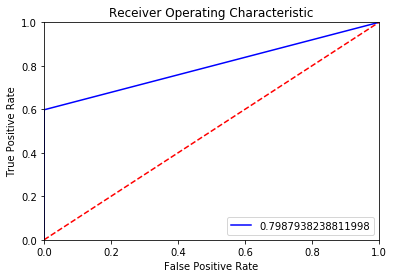

In [74]:
import matplotlib.pyplot as plt
#%matplotlib inline
plt.title('Receiver Operating Characteristic') #to give the name for the graph
plt.plot(fpr, tpr, 'b', label = auc) #plot function that is used to generate plot /line graph
plt.legend(loc = 'lower right') #where the lable ti be placed
plt.plot([0, 1], [0, 1],'r--')# it is usedto get "a red dotted/'-' line"
plt.xlim([0, 1]) #to defibe the scale of x
plt.ylim([0, 1]) #to define the scale of y
plt.xlabel('False Positive Rate') #to lable x-axis
plt.ylabel('True Positive Rate') #to lable y-axis

plt.show()

In [75]:
from sklearn import metrics #roc curve is used to get the array that pass through for the auc curve

fpr, tpr,z = metrics.roc_curve(Y_test, y_pred_prob[:,1])#ROC curve
auc = metrics.auc(fpr,tpr) #AUC curve
print(auc)
print(fpr)
print(tpr)

0.8904391069341034
[0.00000000e+00 0.00000000e+00 3.89590151e-06 3.89590151e-06
 7.79180302e-06 7.79180302e-06 1.16877045e-05 1.16877045e-05
 1.55836060e-05 1.55836060e-05 1.94795076e-05 1.94795076e-05
 2.33754091e-05 2.33754091e-05 2.72713106e-05 2.72713106e-05
 3.11672121e-05 3.11672121e-05 3.50631136e-05 3.50631136e-05
 3.89590151e-05 3.89590151e-05 4.28549166e-05 4.28549166e-05
 4.67508181e-05 4.67508181e-05 5.06467197e-05 5.06467197e-05
 5.45426212e-05 5.45426212e-05 5.84385227e-05 5.84385227e-05
 7.01262272e-05 7.01262272e-05 7.40221287e-05 7.40221287e-05
 9.73975378e-05 9.73975378e-05 1.05189341e-04 1.05189341e-04
 1.12981144e-04 1.12981144e-04 1.16877045e-04 1.16877045e-04
 1.28564750e-04 1.28564750e-04 1.51940159e-04 1.51940159e-04
 1.63627863e-04 1.63627863e-04 1.71419667e-04 1.71419667e-04
 1.94795076e-04 1.94795076e-04 1.98690977e-04 1.98690977e-04
 2.02586879e-04 2.02586879e-04 2.14274583e-04 2.14274583e-04
 2.37649992e-04 2.37649992e-04 2.45441795e-04 2.45441795e-04
 2.49

In [ ]:
import matplotlib.pyplot as plt
#%matplotlib inline
plt.title('Receiver Operating Characteristic') #to give the name for the graph
plt.plot(fpr, tpr, 'b', label = auc) #plot function that is used to generate plot /line graph
plt.legend(loc = 'lower right') #where the lable ti be placed
plt.plot([0, 1], [0, 1],'r--')# it is usedto get "a red dotted/'-' line"
plt.xlim([0, 1]) #to defibe the scale of x
plt.ylim([0, 1]) #to define the scale of y
plt.xlabel('False Positive Rate') #to lable x-axis
plt.ylabel('True Positive Rate') #to lable y-axis

plt.show()

In [ ]:
#Using cross validation

classifier=(LogisticRegression())
#instead of logisic regression you can do this for any other technique as well
#just change the logistic regression to a particular technique name you might want to perform

#performing kfold_cross_validation
from sklearn.model_selection import KFold
kfold_cv=KFold(n_splits=10)
print(kfold_cv)

from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy

#the below codes state that to split the data into 10 split that us specified by "cv"
#and the technique used is "logistic regression" i.e given by "classifier" on the trainning or testing data
kfold_cv_result=cross_val_score(estimator=classifier,X=X_train,
                                                 y=Y_train, cv=kfold_cv)
print(kfold_cv_result)
#finding the mean
print(kfold_cv_result.mean())


In [ ]:
#since our model accuracy is not varying much so we can skip this part
'''
#In this part all the k-fold ka trainning part is added and then the model is build (i.e it's heavly loaded) 
#so its takes a lots time to load the model

#not mandatory to do this in all model building part
#use this only if the cross-validation and the base model ka accuracy vary
for train_value, test_value in kfold_cv.split(X_train):
classifier.fit(X_train[train_value], Y_train[train_value]).predict(X_train[test_value])


Y_pred=classifier.predict(X_test)
print(list(zip(Y_test,Y_pred)))

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print()
print("Classificationreport:")
acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)
print(classification_report(Y_test,Y_pred))
'''